Classify animals into dog and cat category based of given features 
- Plays Fetch Game
- Grumpy in nature
- Favorite food


In [1]:
import pandas as pd
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat Food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df

,Plays Fetch,Is grumpy,Favorite food,Species
0,Yes,No,Bacon,Dog
1,No,Yes,Dog Food,Dog
2,No,Yes,Cat food,Cat
3,No,Yes,Bacon,Cat
4,No,No,Cat food,Cat
5,No,Yes,Bacon,Cat
6,No,Yes,Cat Food,Cat
7,No,No,Dog Food,Dog
8,No,Yes,Cat food,Cat
9,Yes,No,Dog Food,Dog


In [4]:
df['B Plays Fetch']=np.where(df['Plays Fetch']=='Yes',True,False)
df['B Is grumpy']=np.where(df['Is grumpy']=='Yes',True,False)
df['B Favorite food']=[(0 if (food=='Bacon') else 1 if (food=='Dog Food') else 2) for food in df['Favorite food']]
df

,Plays Fetch,Is grumpy,Favorite food,Species,B Plays Fetch,B Is grumpy,B Favorite food
0,Yes,No,Bacon,Dog,True,False,0
1,No,Yes,Dog Food,Dog,False,True,1
2,No,Yes,Cat food,Cat,False,True,2
3,No,Yes,Bacon,Cat,False,True,0
4,No,No,Cat food,Cat,False,False,2
5,No,Yes,Bacon,Cat,False,True,0
6,No,Yes,Cat Food,Cat,False,True,2
7,No,No,Dog Food,Dog,False,False,1
8,No,Yes,Cat food,Cat,False,True,2
9,Yes,No,Dog Food,Dog,True,False,1


In [5]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(df[["B Plays Fetch","B Is grumpy","B Favorite food"]],df['Species'])
print("Extracted Classes",decisiontree.classes_)

Extracted Classes ['Cat' 'Dog']


['Dog' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Dog' 'Dog' 'Cat'
 'Cat' 'Dog']


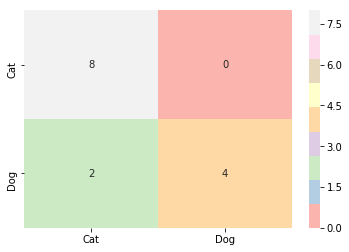

In [6]:
import seaborn
Predicted_Species=obtained_tree.predict(df[["B Plays Fetch","B Is grumpy","B Favorite food"]])
print(Predicted_Species)
seaborn.heatmap(confusion_matrix(df['Species'],Predicted_Species),annot=True,cmap="Pastel1",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

In [7]:
import os
os.environ["PATH"]+=os.pathsep+'D:\\Python\\bin'

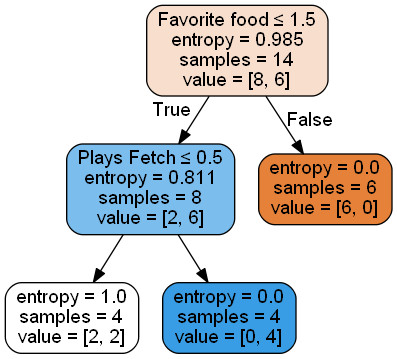

In [8]:
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["Plays Fetch","Is grumpy","Favorite food"],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())